# Crash 2 Dataset

## Data Supplier

This data was supplied by the Vanderbilt Department of Biostatistics at http://hbiostat.org/data/ accessed in Jan 2023.

Vanderbilt obtained this data from a clinical trial dataset originally provided by the  Bank of Injury and Emergency Research Data from the UK.

## Data Description
This data represents patients in a clinical trail who received treatment after physical trauma.
- 20207 observations and 44 variables
- **Full data source description** can be accessed at http://hbiostat.org/data/repo/crash2.html or in this project's data folder in [crash2.html](data/crash2.hml).
- **Data dictionary** available at http://hbiostat.org/data/repo/Ccrash2.html or in this project's data folder in [Ccrash2.hml](data/Ccrash2.hml)
  - I have converted the table of the html data dictionary to a csv: [crash_dictionary.csv](data/crash_dictionary.csv)

In [26]:
import pandas as pd
import numpy as np
import sklearn
import panel as pn
pn.extension()


In [6]:

#import the data dictionary using a custom module
# import sys
# sys.path.append('./')
import crash_dictionary
crash_info = crash_dictionary.CrashDict('./data/crash_dictionary.csv')
display(crash_info.get_labels('gcs'))
display(crash_info.get_details('cause'))
# crash_info.get_df()

,Labels
Name,
gcs,Glasgow Coma Score Total


,Labels,Units,Levels,Class,Storage,NAs
Name,,,,,,
cause,Main Cause of Death,NaN,7.0,NaN,integer,17118


In [3]:
crash_df = pd.read_stata('./data/crash2.dta')

In [4]:
default_max_columns = 20
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', default_max_columns)

In [5]:

display(crash_df.sample(n = 3))
# print(crash_df.sample(n = 3))


,entryid,source,trandomised,outcomeid,sex,age,injurytime,injurytype,sbp,rr,cc,hr,gcseye,gcsmotor,gcsverbal,gcs,ddeath,cause,scauseother,status,ddischarge,condition,ndaysicu,bheadinj,bneuro,bchest,babdomen,bpelvis,bpe,bdvt,bstroke,bbleed,bmi,bgi,bloading,bmaint,btransf,ncell,nplasma,nplatelets,ncryo,bvii,boxid,packnum
5499,5506,electronic CRF by email,17383.0,5148.0,male,26.0,0.5,penetrating,100.0,20.0,3.0,110.0,4.0,6.0,5.0,15.0,NaN,NaN,,discharged,17383.0,minor symptoms,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,4272,48
11400,11423,electronic CRF by email,17765.0,14954.0,male,35.0,0.5,penetrating,50.0,25.0,3.0,65.0,4.0,5.0,3.0,12.0,NaN,NaN,,discharged,17770.0,no symptoms,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,3.0,0.0,0.0,0.0,2595,27
9440,9459,electronic CRF by email,17684.0,8654.0,male,42.0,1.0,blunt,92.0,27.0,5.0,103.0,3.0,5.0,4.0,12.0,NaN,NaN,,discharged,17690.0,minor symptoms,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,2538,24


# Evaluate missing data

In [22]:
crash_df_count = crash_df.count()
value_count_df = pd.DataFrame({ 
    "entered-values": crash_df_count,
    "missing-values": len(crash_df) - crash_df_count
    }, 
    index = crash_df.columns
)

incomplete_features_df = value_count_df.loc[value_count_df["missing-values"]>0]


qty_features = len(crash_df.columns)
print(f"Number of features         : {qty_features}")

qty_incomplete_features = len(incomplete_features_df.index)
qty_complete_features = qty_features - qty_incomplete_features
names_complete_features = set(crash_df.columns).difference(set(incomplete_features_df.index))

print(f"Number of complete features: {qty_complete_features}")
print(f"Names of complete features : {names_complete_features}")
print(f"Number of incomplete features = {qty_incomplete_features}")

Number of features         : 44
Number of complete features: 7
Names of complete features : {'scauseother', 'entryid', 'trandomised', 'boxid', 'injurytype', 'source', 'packnum'}
Number of incomplete features = 37


<AxesSubplot: title={'center': 'features with missing values'}>

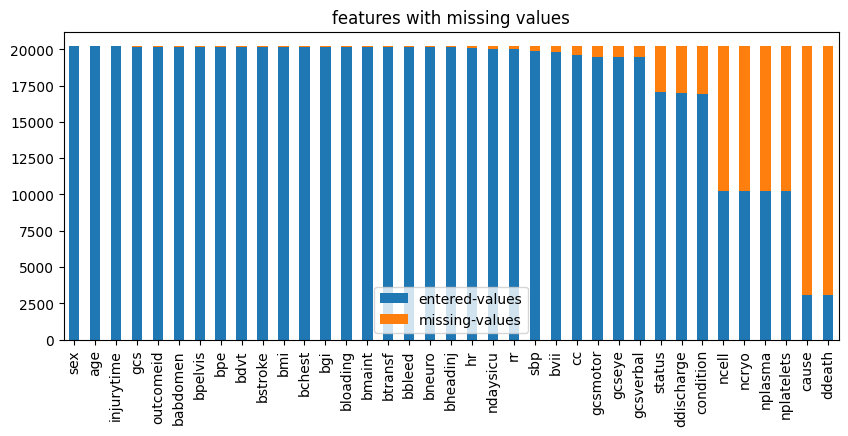

In [23]:

# missing_values_df = value_count_df.drop(complete_features)
incomplete_features_df.sort_values(by=['missing-values']).plot.bar(title='features with missing values', stacked=True, figsize=(10,4))

# Fixing the GCS values
